# River Morphology Research: Comparing Water Volume to Water Area During Flood Events

**Authors:** <br>
_Avra Saslow & Kristen Tortorelli_ <br>


# Intro

The premise of this research project is to contextualize flooding with satellite data, rather than relying on stream gage data to indicate whether or not water levels are above a flood threshold. It's important to model overbank flooding because it's crucial to understand _where_ and _how_ exactly a landscape floods. The ability to monitor and predict the extent of flooding across a landscape is critical for managing phenomena such as agricultural irrigation and habitat conservation. 

This cannot just be done with stream gage data; stream gage data only tells us when the water level or flow is above a certain threshold. Moreover, gauging stations generally fail to provide accurate flow observations during extreme events due to the distributed complex nature of flood processes.

Utilizing other data types, such as satellite imagery, can provide a better understanding of how rivers flood. It's important to see not only where on a floodplain the water travels to, but where that water carries sediment loads to as well. That's why our research is comprised of modelling where stream gage data (i.e., water volume) and satellite imagery (i.e., water area) converge, because it could give us a better understanding of _where_ water and and sediment go when water levels hit a flood level threshold.

This research sits under the umbrella of a larger research effort called the River Morphology Information System, or RIMORPHIS, which is a USF-funded, collaborative project. The goal of RIMORPHIS is to create a user-friendly information system that enables its community to observe and record important variables for modeling streamflow and sediment transport across the U.S.

Our piece of research fits into that mission because it evaluates if multiple methods of measurement create a stronger and more accurate model for overbank flooding, rather than relying on a single data point (such as precipitation, or stream gage data). 

To narrow our scope of work, we decided to specifically study flood events at 1-3 locations that had both stream gage or stream height data and clear enough satellite images. For this stage in our study, we're simply looking to find if there is any correlation between stream gage/height data and the number of water pixels counted for the same time period in the study area. 

---

# What Other Work Has Been Done in This Area

There has been research conducted by a few groups on integrating stream gage data and Landsat imagery to model watersheds. An international team from Italy and the U.S assimilated both types of data with The Tiber River in central Italy as a case study. Their main goal was to build a predictive flood model that would provide near-real time flood mapping. Their study focused on comparing the flood extent detected from satellite images with the ensemble of flood extents simulated by a hydraulic model they built based on stream gage data. 

We found a few interesting similarities and differences between our work and their's. We both believe that there is uncertainty introduced into each of our respective studies due to error in water surface detection from satellite images that could overestimate or underestimate the flood extension. However, we differed in which kinds of satellite images we used, and the index we made models based on. To model flooding with satellite images, we need a method to extract the surface water from the surrounding vegetation, and this is done using an equation called NDWI, or Normalized Difference Water Index. This study used a Modified Normalized Difference Water Index, which can help enhance open water features. Furthermore, they used Landsat imagery, whereas we used Sentinel-2. 

On the contrary, researchers with the USGS wanted to take a look at the past, and instead of building future flooding tools, complete a time-series of surface water extents in Central Valley, CA from 1984 to 2015. They, too, used Landsat imagery. For their stream gage data, they choose as many stream gage locations as possible and extracted monthly average discharge for each site. This differs from our study, as we're looking for the monthly maximum discharge, to better understand flood events, whereas they're trying to build a time-series for surface water extents. 

Overall, we think that there are similar building blocks out there for assimilating satellite imagery and stream gage data, but our goals are different - we're trying to find the convergence between satellite imagery and stream gage data instead of running dense models using the two. 

"Simultaneous assimilation of water levels from river gauges and
satellite flood maps for near-real time flood mapping": https://hess.copernicus.org/preprints/hess-2021-125/hess-2021-125.pdf

Annis, A., Nardi, F., & Castelli, F. (2022). Simultaneous assimilation of water levels from river gauges and satellite flood maps for near-real-time flood mapping. Hydrology and Earth System Sciences, 26(4), 1019. https://link.gale.com/apps/doc/A694555103/AONE?u=anon~a9304de6&sid=googleScholar&xid=62795a65

"Integrating stream gage data and Landsat imagery to complete time-series of surface water extents in Central Valley, California": https://www.sciencedirect.com/science/article/pii/S0303243419308049?via%3Dihub

Walker JJ, Soulard CE, and Petrakis RE, 2019, Datasets for Integrating stream gage data and Landsat imagery to complete time-series of surface water extents in Central Valley, California: U.S. Geological Survey data release, https://doi.org/10.5066/P9XPA5AK.

# Methodology

This is the beginnings of our workflow to compare stream gage data (water volume) against satellite imagery (water area). The notebook runs through downloading NWIS data and Sentinel-2 data, as well as plotting areas of interest and their associate NDWI images and water pixel extraction and count. Each step of the workflow has been repeated for each area of interest, as we have not made an automated flow yet. The two sites of interest are Vicksburg, Mississippi, and Pine Bluff, Arkansas. The variable names for each site reflect the location. 

General steps in our workflow can be divided into a stream gage analysis and satellite image analysis. This notebook provides the following workflow steps:
1. Define site parameters (area, gage no., wet and dry seasons) 

2. Generate true colors images for wet and dry seasons with Sentinel-2 data for each site using GEE.

3. Use hydrofunctions library to download stream gage data for each location, save to pd dataframe

4. Plot the time series of discharge (matplotlib) over 1-2 years, observe patterns, seasonality, progression of discharge/gage height, etc.

5. Select time period (6-12 months) around flood event and validate wet and dry seasons

6. Generate images (true color and NDWI) for each site that depict wet (high discharge or gage height values) and dry (low discharge or gage height values)

7. Filter/clean up images as required (remove clouds, etc...)

8. Classify water pixels for each image, and generate water pixel counts

The next steps that will continue this workflow are provided at the end of this report. 

## Data Sources 

### Stream Gage Data
The stream gage data for all three sites was obtained from the U.S. Geological Survey (USGS) website: 

Pine Bluff, AR Site: U.S. Geological Survey, 2016, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed April 27, 2022, at URL [https://waterdata.usgs.gov/nwis/dv?cb_00065=on&format=gif_default&site_no=07263650&referred_module=sw&period=&begin_date=2019-01-02&end_date=2020-01-01].

Vicksburg, MS Site: U.S. Geological Survey, 2016, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed April 27, 2022, at URL [https://waterdata.usgs.gov/nwis/uv?site_no=07289000].

### Sentinel-2 Data  
 Sentinel-2 (ESA) images courtesy of the U.S. Geological Survey

 'Copernicus Sentinel data 2019, 2021' for Sentinel data;

## Google Earth Engine Requirements

To run this workflow, you must sign up for [Google Earth Engine](https://signup.earthengine.google.com/#!/), and enter an authentication code to initialize it. 

In [19]:
!pip install geemap

## Import Libraries


In [20]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import folium
import geemap.foliumap as geemap
import ee
import matplotlib.dates as mdates
import hydrofns

%matplotlib inline

## Authenticate Google Earth Engine

In [21]:
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AX4XfWgUEmkNPOzPx1StXInMvA3xcnMPXsaX_h2WlZyIBnR5LpqcvSUikRE

Successfully saved authorization token.


## Site Info for All Gage Sites

The first part to extract both the satellite imagery and stream gage data is specifying the start and end time for time series as well as geographic region to process. This can be changed to river gages and time periods.

### Site Selection
When selecting which sites to analyze for this project, we evaluated possibilities against a number of criteria. We wanted a river site that was data-rich, and had experienced a major flooding event within the last few years. USGS stream gages across the US vary greatly in their scope of data collection, both with regards to which parameters are measured and over what time span they have been measured. The Vicksburg, MS and Pine Bluff, AR river sites have daily stream data for discharge (cfs) and gage height (ft) over at least the past ten years, meaning that their stream gage data have been reviewed and approved by USGS. Additionally, Sentinel-2 data over Vicksburg and Pine Bluff are frequent enough to capture flooding events, and have little cloud interference or river sediment content that could hinder water pixel extraction for these sites. Lastly, both of these sites experienced major flooding events in 2019, for which there is sufficient data to capture pre- and post-flood conditions to better understand the flood impacts. 

### Vicksburg, MS

In [22]:
# site number for NWIS gage (Vicksburg MS Site)
vicksburg = ['07289000']

# Coordinates for the bounds of a rectangle at Vicksburg MS
vicksburg_xMin = -91.2
vicksburg_yMin = 32
vicksburg_xMax = -90.8
vicksburg_yMax = 32.7

# Vicksburg MS wet and dry seasons
vicksburg_wet_season_start = '2019-03-15'
vicksburg_wet_season_end = '2019-05-01'

vicksburg_dry_season_start = '2019-9-01'
vicksburg_dry_season_end = '2019-10-01'

vicksburg_Map = geemap.Map(center=[32.3, -90.9], zoom=11)
vicksburg_Map

### Pine Bluff, AR

In [23]:
# site number for NWIS gage (Pine Bluff AR Site)
pineBluff = ['07263650']

# Coordinates for the bounds of a rectangle at Pine Bluff AR
pineBluff_xMin = -92.4
pineBluff_yMin = 34
pineBluff_xMax = -91.7
pineBluff_yMax = 34.4

# Pine Bluff AR wet and dry seasons
pineBluff_wet_season_start = '2019-05-15'
pineBluff_wet_season_end = '2019-06-15'

pineBluff_dry_season_start = '2019-09-01'
pineBluff_dry_season_end = '2019-12-01'

pineBluff_Map = geemap.Map(center=[34.2, -92], zoom=11)
pineBluff_Map

***


## Use Google Earth Engine to extract Sentinel-2 collection for time period and area of interest

Knowing the geometry of each location, we can extract Sentinel-2 imagery for the specific time period in that area using Google Earth Engine. For this report we filtered out clouds when we extracted the Image (an Image is an object format Google Earth Engine uses). This method generates composite images, so in future work will create a cloud mask and download data to create simple homogeneous images.

In [24]:
# Import the Sentinel 2 collection as sentinel 2
sentinel2 = ee.ImageCollection(
    'COPERNICUS/S2_SR').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

# Vicksburg geometry
vicksburg_rectangleGeoJSON = ee.Geometry.Rectangle(
    [
        [vicksburg_xMin, vicksburg_yMin],
        [vicksburg_xMax, vicksburg_yMax]   # max x and y
    ]
)

# Pine Bluff geometry
pineBluff_rectangleGeoJSON = ee.Geometry.Rectangle(
    [
        [pineBluff_xMin, pineBluff_yMin],
        [pineBluff_xMax, pineBluff_yMax]   # max x and y
    ]
)

# Palettes for Visualization
trueColor_palette = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}
waterPalette = ['red', 'yellow', 'green', 'blue']

### GEE Script for Vicksburg, MS

In [25]:
vicksburg_bnds = ee.FeatureCollection([
    ee.Feature(
        vicksburg_rectangleGeoJSON,
        {'name': 'Mississippi Vicksburg', 'fill': 1}),
])

vicksburg_dry_season = sentinel2.filterBounds(vicksburg_bnds).filterDate(
    vicksburg_dry_season_start, vicksburg_dry_season_end).mosaic().clip(vicksburg_bnds)
vicksburg_wet_season = sentinel2.filterBounds(vicksburg_bnds).filterDate(
    vicksburg_wet_season_start, vicksburg_wet_season_end).mosaic().clip(vicksburg_bnds)

### Display Earth Engine True Color Images layers in Dry Season - Vicksburg MS

In [26]:
Map = geemap.Map(center=[32.3, -90.9], zoom=12)
Map.addLayer(vicksburg_dry_season, trueColor_palette,
             '2019 Dry season true color')
Map.addLayerControl()
Map

### Display Earth Engine True Color Images layers in Wet Season - Vicksburg MS

In [27]:
Map = geemap.Map(center=[32.3, -90.9], zoom=12)
Map.addLayer(vicksburg_wet_season, trueColor_palette,
             '2019 Wet season true color')
Map.addLayerControl()
Map

### GEE Script for Pine Bluff AR

In [28]:
# Import the Sentinel 2 collection as sentinel 2

pineBluff_bnds = ee.FeatureCollection([
    ee.Feature(
        pineBluff_rectangleGeoJSON,
        {'name': 'Pine Bluff, AR', 'fill': 1}),
])

pineBluff_dry_season = sentinel2.filterBounds(pineBluff_bnds).filterDate(
    pineBluff_dry_season_start, pineBluff_dry_season_end).mosaic().clip(pineBluff_bnds)
pineBluff_wet_season = sentinel2.filterBounds(pineBluff_bnds).filterDate(
    pineBluff_wet_season_start, pineBluff_wet_season_end).mosaic().clip(pineBluff_bnds)

### Display Earth Engine True Color Images layers in Dry Season - Pine Bluff AR

In [29]:
Map = geemap.Map(center=[34.2, -92], zoom=11)
Map.addLayer(pineBluff_dry_season, trueColor_palette,
             '2019 Dry season true color')
Map.addLayerControl()
Map

### Display Earth Engine True Color Images layers in Wet Season - Pine Bluff AR

In [30]:
Map = geemap.Map(center=[34.2, -92], zoom=11)
Map.addLayer(pineBluff_wet_season, trueColor_palette,
             '2019 Wet season true color')
Map.addLayerControl()
Map

***

## Extract NWIS data

Referring back to our workflow, we are conducting the satellite analysis in conjunction with the stream gage data analysis. This section analyzes stream gage data provided by USGS to determine and validate wet and dry seasons defined above, and ensure we have captured flow/gage height peaks and minimums. Ultimately we will extract maximum monthly data from stream gage data, and generate Sentinel-2 satellite and water pixel images that match time periods. 

Some locations have just stream gage data, others just have gage height data. We are analyzing both parameters to determine if one has a stronger correlation to flooded water pixel count. The two functions below extract stream gage data and gage height data respectively using the hydrofunctions library from USGS.

In [31]:
# function that finds stream gage data for any given site and time frame
#def create_stream_gage_df(site, start, end):
 #   """Imports data to dataframe, adds geolocation and stream gage site name
#
 #   Parameters
  #  ----------
   # site : string
    #    Site number as specified by USGS

   # start : string
    #    Desired start date for data

#    end : string
 #       Desired end date for data 

  #  Returns
   # -------
    #response_df : dataframe
     #   Dataframe created from downloaded csv    """

    # Generate dataframe from NWIS for gage discharge data at specified sites
  #  response = hf.NWIS(site, 'dv', start, end, parameterCd='00060')
   # response_df = response.df()

    # Rename columns for discharge and flags
    #response_df.columns = ('discharge', 'qualifiers')

    # Add column for site name
    #response_df["sitename"] = hf.get_nwis_property(
     #   response.json, key='siteName')[0]

    # Add columns for gage location latitude and longitude
    #geolocation = hf.get_nwis_property(response.json, key='geoLocation')[0]
    #response_df["latitude"] = geolocation["geogLocation"]["latitude"]
    #response_df["longitude"] = geolocation["geogLocation"]["longitude"]

    #return response_df

# function that finds stream gage height data for any given site and time frame


#def create_df_gageht(site, start, end):
#    """Imports data to dataframe, adds geolocation and stream gage height site name

 #   Parameters
  #  ----------
   # site : string
#        Site number as specified by USGS

 #   start : string
  #      Desired start date for data

   # end : string
    #    Desired end date for data 

   # Returns
    #-------
    #response_df : dataframe
     #   Dataframe created from downloaded csv    """

    ## Generate dataframe from NWIS for gage discharge data at specified sites
    #response = hf.NWIS(site, 'dv', start, end, parameterCd='00065')
    #response_df = response.df()

    # Rename columns for discharge and flags
    #response_df.columns = ('gage ht', 'qualifiers')

    #return response_df

### Extract & plot data from NWIS site - Vicksburg MS

In [32]:
vicksburg_site_df = hydrofns.create_stream_gage_df(
    vicksburg, vicksburg_wet_season_start, vicksburg_wet_season_end)
vicksburg_site_df

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07289000&parameterCd=00060&startDT=2019-03-15&endDT=2019-05-01


,discharge,qualifiers,sitename,latitude,longitude
datetimeUTC,,,,,
2019-03-15 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-16 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-17 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-18 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-19 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-20 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-21 00:00:00+00:00,1850000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-22 00:00:00+00:00,1850000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-23 00:00:00+00:00,1840000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Stream Discharge \n (cu. ft. / second)')]

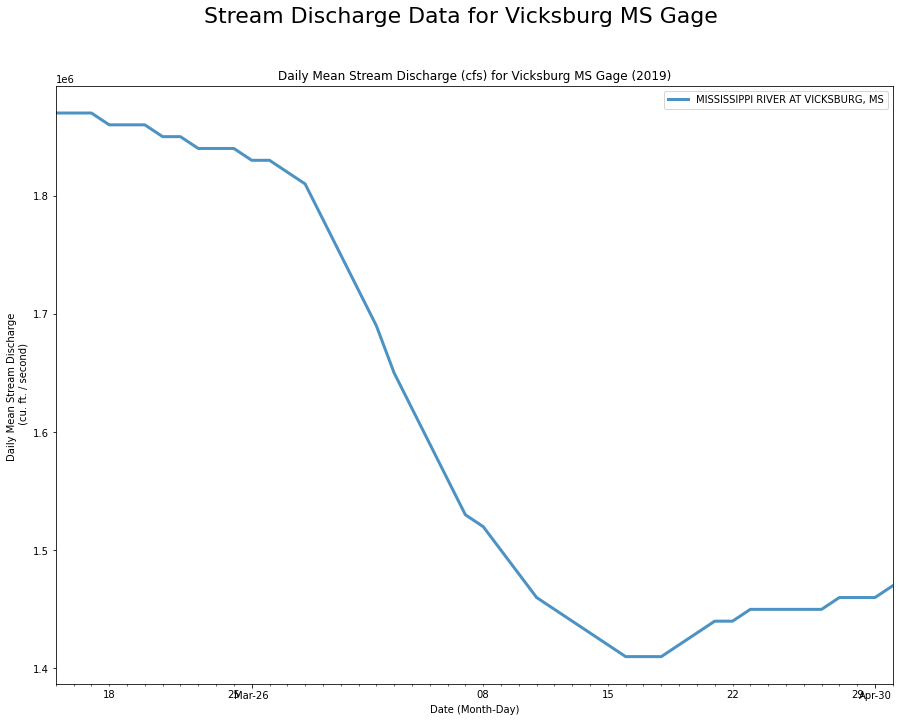

In [33]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 11))

fig.suptitle(
    "Stream Discharge Data for Vicksburg MS Gage", fontsize=22)

# Loop for plotting Subplot 1
for site_name, group in vicksburg_site_df.groupby('sitename'):
    group.groupby('sitename').plot(y='discharge',
                                   title="Daily Mean Stream Discharge (cfs) for Vicksburg MS Gage (2019)",
                                   label=site_name,
                                   linewidth=3.0,
                                   ax=ax1,
                                   alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Stream Discharge \n (cu. ft. / second)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

### Extract & plot data from NWIS site - Pine Bluff AR

In [34]:
pineBluff_site_df = hydrofns.create_df_gageht(
    pineBluff, pineBluff_wet_season_start, pineBluff_dry_season_end)
pineBluff_site_df

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07263650&parameterCd=00065&startDT=2019-05-15&endDT=2019-12-01


,gage ht,qualifiers
datetimeUTC,,
2019-05-15 00:00:00+00:00,37.14,A
2019-05-16 00:00:00+00:00,36.94,A
2019-05-17 00:00:00+00:00,36.23,A
2019-05-18 00:00:00+00:00,35.73,A
2019-05-19 00:00:00+00:00,35.72,A
...,...,...
2019-11-27 00:00:00+00:00,31.56,A
2019-11-28 00:00:00+00:00,31.47,A
2019-11-29 00:00:00+00:00,31.53,A


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Gage Height \n (ft)')]

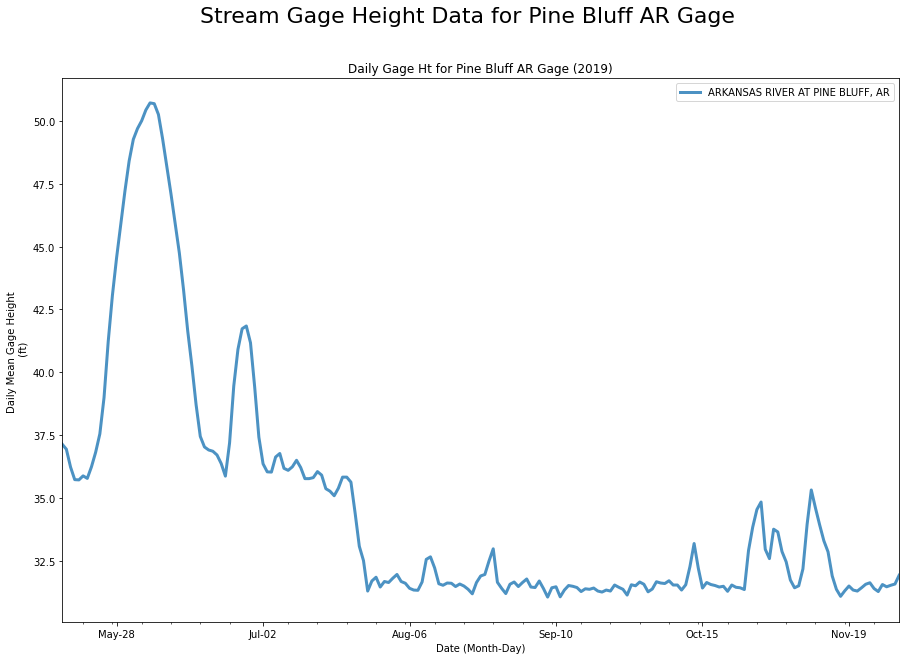

In [35]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))

fig.suptitle(
    "Stream Gage Height Data for Pine Bluff AR Gage", fontsize=22)

# Loop for plotting Subplot 1
pineBluff_site_df.plot(y='gage ht',
                       title="Daily Gage Ht for Pine Bluff AR Gage (2019)",
                       label='ARKANSAS RIVER AT PINE BLUFF, AR',
                       linewidth=3.0,
                       ax=ax1,
                       alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Gage Height \n (ft)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

***

## NDWI Analysis

The formula for calculating the Normalized Difference Water Index (NDWI) is as follows: 

`NDWI = (G-NIR)/(G+NIR)`

For Sentinel-2 the green band is B3 and and near-infrared band is B8, both at a resolution of 10m. We'll apply the NDWI index to our images, and it will reveal how the waterways change in wet and dry seasons for both locations.

### Vicksburg NDWI Images in Dry Season

In [36]:
vicksburg_dry_season_Map = geemap.Map(center=[32.3, -90.9], zoom=11)
vicksburg_ndwi_dry = vicksburg_dry_season.normalizedDifference(['B3', 'B8'])
vicksburg_dry_season_Map.addLayer(vicksburg_ndwi_dry, {
                                  'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI')
vicksburg_dry_season_Map

### Vicksburg NDWI Images in Wet Season

In [37]:
vicksburg_wet_season_Map = geemap.Map(center=[32.3, -90.9], zoom=11)
vicksburg_ndwi_wet = vicksburg_wet_season.normalizedDifference(['B3', 'B8'])
vicksburg_wet_season_Map.addLayer(vicksburg_ndwi_wet, {
                                  'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI')
vicksburg_wet_season_Map

### Pine Bluff NDWI Images in Dry Season

In [38]:
pineBluff_dry_season_Map = geemap.Map(center=[34.2, -92], zoom=11)
pineBluff_ndwi_dry = pineBluff_dry_season.normalizedDifference(['B3', 'B8'])
pineBluff_dry_season_Map.addLayer(pineBluff_ndwi_dry, {
                                  'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Dry season NDWI')
pineBluff_dry_season_Map

### Pine Bluff NDWI Images in Wet Season

In [39]:
pineBluff_wet_season_Map = geemap.Map(center=[34.2, -92], zoom=11)
pineBluff_ndwi_wet = pineBluff_wet_season.normalizedDifference(['B3', 'B8'])
pineBluff_wet_season_Map.addLayer(pineBluff_ndwi_wet, {
                                  'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI')
pineBluff_wet_season_Map

***

## Extract Water Pixels

In order to isolate the riverbed from the rest of the information (such as land, vegetation found in the NDWI analysis), we have to extract just the water pixels. This is our first step towards being able to measure _how much_ area the riverbed takes up on the landscape throughout different seasons. 

Water pixels are extracted using the NDWI images generated above. Setting an ndwi_threshold equal to zero returns an image for which all NDWI zero values are set to blue color, indicating water presence. 

### Wet season water extent in Vicksburg

In [40]:
vicksburg_wet_season_Map = geemap.Map(center=[32.3, -90.9], zoom=11)

ndwi_threshold = 0
vicksburg_wet_season_image = vicksburg_ndwi_wet.gt(ndwi_threshold).selfMask()

vicksburg_wet_season_Map.addLayer(vicksburg_wet_season_image, {
                                  'palette': 'blue'}, 'Water image')
vicksburg_wet_season_Map

### Dry season water extent in Vicksburg

In [41]:
vicksburg_dry_season_Map = geemap.Map(center=[32.3, -90.9], zoom=11)

ndwi_threshold = 0
vicksburg_dry_season_image = vicksburg_ndwi_dry.gt(ndwi_threshold).selfMask()

vicksburg_dry_season_Map.addLayer(vicksburg_dry_season_image, {
                                  'palette': 'blue'}, 'Water image')
vicksburg_dry_season_Map

### Wet season water extent in Pine Bluff


In [42]:
pineBluff_wet_season_Map = geemap.Map(center=[34.2, -92], zoom=11)

ndwi_threshold_ar = 0
pineBluff_wet_season_image = pineBluff_ndwi_wet.gt(
    ndwi_threshold_ar).selfMask()

pineBluff_wet_season_Map.addLayer(pineBluff_wet_season_image, {
                                  'palette': 'blue'}, 'Water image')
pineBluff_wet_season_Map

### Dry season water extent in Pine Bluff

In [43]:
pineBluff_dry_season_Map = geemap.Map(center=[34.2, -92], zoom=11)

ndwi_threshold_ar = 0
pineBluff_dry_season_image = pineBluff_ndwi_dry.gt(
    ndwi_threshold_ar).selfMask()

pineBluff_dry_season_Map.addLayer(pineBluff_dry_season_image, {
                                  'palette': 'blue'}, 'Water image')
pineBluff_dry_season_Map

***

## Count Water Pixels

Finally, we can see the area that the water fills during wet and dry season. Now, we need to count how many pixels that actually is, so that we can ultimately compare that number to the volume of water from the stream gage. 

The water pixel count is calculated using GEE's 'Reducer' class, which can specify how data is aggregated. This report aggregates band data with a simple count function to determine the number of water pixels in an image. 

### Count water pixels for Vicksburg

In [44]:
# Reduce the region. The region parameter is the Feature geometry.
vicksburg_count_pixels_wet = vicksburg_wet_season_image.reduceRegion(**{
    'reducer': ee.Reducer.count(),
    'geometry': vicksburg_bnds.geometry(),
    'scale': 10,
    'maxPixels': 1e9
})

# Reduce the region. The region parameter is the Feature geometry.
vicksburg_count_pixels_dry = vicksburg_dry_season_image.reduceRegion(**{
    'reducer': ee.Reducer.count(),
    'geometry': vicksburg_bnds.geometry(),
    'scale': 10,
    'maxPixels': 1e9
})

# The result is a Dictionary.  Print it.
print("Vicksburg water pixel count in the wet season: ",
      vicksburg_count_pixels_wet.getInfo())
print("Vicksburg water pixel count in the dry season: ",
      vicksburg_count_pixels_dry.getInfo())

Vicksburg water pixel count in the wet season:  {'nd': 7168558}
Vicksburg water pixel count in the dry season:  {'nd': 2668216}


### Count water pixels for Pine Bluff

In [45]:
# Reduce the region. The region parameter is the Feature geometry.
pineBluff_count_pixels_wet = pineBluff_wet_season_image.reduceRegion(**{
    'reducer': ee.Reducer.count(),
    'geometry': pineBluff_bnds.geometry(),
    'scale': 10,
    'maxPixels': 1e9
})

# Reduce the region. The region parameter is the Feature geometry.
pineBluff_count_pixels_dry = pineBluff_dry_season_image.reduceRegion(**{
    'reducer': ee.Reducer.count(),
    'geometry': pineBluff_bnds.geometry(),
    'scale': 10,
    'maxPixels': 1e9
})

# The result is a Dictionary.  Print it.
print("Pine Bluff water pixel count in the wet season: ",
      pineBluff_count_pixels_wet.getInfo())
print("Pine Bluff water pixel count in the dry season: ",
      pineBluff_count_pixels_dry.getInfo())

Pine Bluff water pixel count in the wet season:  {'nd': 857159}
Pine Bluff water pixel count in the dry season:  {'nd': 690287}


***

## Summary and Conclusions

Ultimately, we have demonstrated that we were able to successfully extract water pixels for wet and dry seasons at each river site. To continue this project we will perform this same methodology and analysis over a series of time, and we are in the process of developing functions and automations that will do precisely that. We were initially concerned that the wet season would introduce uncertainty, as it has a tendency to include more cloud cover and sediment-filled rivers. Higher cloud cover makes it harder to get clear images over a series of time, and sediment-filled rivers make it difficult to extract the water from the land, as they look more similiar. However, we were able to find locations that had clear enough skies and water to actually build an impactful analysis. Our water extraction was successful, and didn't require additional cleaning to filter out the sediment. 

The images above show that for the Vicksburg MS and Pine Bluff AR sites, the flooded extent that is shown during wet seasons can be observed and quantified by generating Normalized Difference Water Index (NDWI) images, and using those to extract and count water pixels. As a result of this analysis, the relationship between satellite data and USGS stream gage data can be further developed by plotting water pixel counts at several different dates against maximum monthly discharge or gage height data. The final plot should depict a curve that shows the discharge/gage height point at which water pixel count begins to dramatically increase - indicating that overbank flooding has occured. 

## Future Work

We're very excited for the next stages of our work! This includes fully building out an automation that will enable us to extract water pixels from images over a time series. This work is well on its way, and is in an exploratory notebook in our Github repo now. We're also looking to develop another NWIS function that will extract the _maximum_ monthly discharge, and from there, we can plot that against the water pixel count for each month. Finally, we'd like to work a bit more on making a split map with one the libraries we use - geemap. We attempted this, but geemap will only intake certain data types, and our maps didn't match any for some reason. It would be visually interesting to have both the dry season and wet season for each location on the same map, so we'll put effort into making that a reality in future work. 
